In [1]:
#Packages Setup

!pip install --upgrade xlrd

!pip install --upgrade ipykernel
!pip install flair
!apt-get -qq install -y libfluidsynth1
!pip install contractions
!pip install BERTopic



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.25.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.6 MB/s eta 0:00:0

In [5]:
#library setup
import re
from wordcloud import WordCloud
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint
import contractions
import pickle
import os
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
import locale
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
#load dataset
import pandas as pd
df = pd.read_excel('/content/ai_dataset1.xlsx')

In [7]:
#view top5
df.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Korteling, JE; Van de Boer-Visschedijk, GC; Bl...",NaN,NaN,NaN,"Korteling, J. E. (Hans); Van de Boer-Visschedi...",NaN,NaN,Human- versus Artificial Intelligence,FRONTIERS IN ARTIFICIAL INTELLIGENCE,...,NaN,NaN,NaN,33981990.0,NaN,NaN,NaN,NaN,WOS:000751704800034,0
1,C,"Shi, ZZ; Shi, C",NaN,NaN,CAAI,"Shi, Zhongzhi; Shi, Chuan",NaN,NaN,Progress of artificial intelligence,PROCEEDINGS OF 2006 INTERNATIONAL CONFERENCE O...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000245214200215,0
2,C,"Kose, U; Vasant, P",NaN,NaN,IEEE,"Kose, Utku; Vasant, Pandian",NaN,NaN,Fading Intelligence Theory: A Theory on Keepin...,2017 INTERNATIONAL ARTIFICIAL INTELLIGENCE AND...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000426868700075,0
3,J,"Lu, HM; Li, YJ; Chen, M; Kim, H; Serikawa, S",NaN,NaN,NaN,"Lu, Huimin; Li, Yujie; Chen, Min; Kim, Hyoungs...",NaN,NaN,Brain Intelligence: Go beyond Artificial Intel...,MOBILE NETWORKS & APPLICATIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000430853600021,0
4,C,"Ramos, C",NaN,"Neves, J; Santos, MF; Machado, JM",NaN,"Ramos, Carlos",NaN,NaN,Ambient Intelligence - A State of the Art from...,"PROGRESS IN ARTIFICIAL INTELLIGENCE, PROCEEDINGS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000252074800024,0


In [8]:
##to view the statistical summary of the dataset
df.describe(include='all')

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
count,14850,14849,21,1886,1261,14849,21,63,14850,14850,...,0.0,0.0,0.0,5.250000e+03,0.0,0.0,0.0,0.0,14850,14850.0
unique,4,14434,16,1321,64,14497,16,61,14745,6366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14850,NaN
top,J,[Anonymous],"Bousse, E","Chova, LG; Martinez, AL; Torres, IC",IEEE,[Anonymous],"Bousse, E",ESR,ARTIFICIAL-INTELLIGENCE,IEEE ACCESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000751704800034,NaN
freq,11629,7,3,20,908,7,3,2,34,176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.372721e+07,NaN,NaN,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.714308e+06,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.380119e+06,NaN,NaN,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.282250e+07,NaN,NaN,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.447191e+07,NaN,NaN,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.572779e+07,NaN,NaN,NaN,NaN,NaN,0.0


In [9]:
#remove the unwanted columns
keep_cols = ['Publication Type', 'Article Title', 'Source Title', 'Abstract']

# Drop columns that are not in the keep_cols list
df = df.drop(columns=[col for col in df.columns if col not in keep_cols])

In [10]:
#to review the top 5
df.head()

,Publication Type,Article Title,Source Title,Abstract
0,J,Human- versus Artificial Intelligence,FRONTIERS IN ARTIFICIAL INTELLIGENCE,AI is one of the most debated subjects of toda...
1,C,Progress of artificial intelligence,PROCEEDINGS OF 2006 INTERNATIONAL CONFERENCE O...,"Artificial Intelligence attempts simulation, e..."
2,C,Fading Intelligence Theory: A Theory on Keepin...,2017 INTERNATIONAL ARTIFICIAL INTELLIGENCE AND...,As a result of unstoppable rise of Artificial ...
3,J,Brain Intelligence: Go beyond Artificial Intel...,MOBILE NETWORKS & APPLICATIONS,Artificial intelligence (AI) is an important t...
4,C,Ambient Intelligence - A State of the Art from...,"PROGRESS IN ARTIFICIAL INTELLIGENCE, PROCEEDINGS",Ambient Intelligence (AmI) deals with a new wo...


In [11]:
#to summarize the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Publication Type  14850 non-null  object
 1   Article Title     14850 non-null  object
 2   Source Title      14850 non-null  object
 3   Abstract          14422 non-null  object
dtypes: object(4)
memory usage: 464.2+ KB


In [12]:
df.describe(include='all')

,Publication Type,Article Title,Source Title,Abstract
count,14850,14850,14850,14422
unique,4,14745,6366,14406
top,J,ARTIFICIAL-INTELLIGENCE,IEEE ACCESS,Artificial intelligence is intelligence reveal...
freq,11629,34,176,2


In [13]:
# to count the number of null values in the abstract
df['Abstract'].isnull().sum()

428

In [14]:
#to remove null
df = df.dropna(subset = 'Abstract')
df['Abstract'].isnull().sum()

0

In [15]:
#to reset the numerical index to 0
df = df.reset_index(drop=True)

In [16]:
#preprocessing the dataset (cleaning the dataset)
def clean_tweet_text(tweet_text):
    tweet_text=str(tweet_text).lower() ## to convert text to lower case
    tweet_text= " ".join([contractions.fix (expanded_word)for expanded_word in tweet_text.split()])
    tweet_text= re.sub('\[*@?\#.]', '',tweet_text) ##to replace regular expression with space
    tweet_text =re.sub('https?://\S+|www@\...\S+','', tweet_text) ##to remove urls
    tweet_text = re.sub(r'\w*#\w*', '', tweet_text) #to remove hastags
    # tweet_text= re.sub('<.*?>+#', '',tweet_text) # to remove html tags
    # tweet_text = re.sub(r'@[A-Za-z0-9 rt p lol ..._]+', '', tweet_text)
    tweet_text= re.sub('[%s]' %  re.escape(punctuation), '', tweet_text) #to remove punctuations
    tweet_text = re.sub('\n', '', tweet_text) #to remove occurence of new lines
    tweet_text= re.sub('\w*\d\w*', '', tweet_text) # to remove digits
    tweet_text = re.sub('\W',' ', tweet_text)


    return tweet_text

In [17]:
#application of the cleaned tweet_text to my dataset
df['clean_Abstract']= df['Abstract'].apply(lambda  tweet_text :clean_tweet_text(tweet_text))


In [18]:
#to view the output
df['clean_Abstract'].head

<bound method NDFrame.head of 0        ai is one of the most debated subjects of toda...
1        artificial intelligence attempts simulation ex...
2        as a result of unstoppable rise of artificial ...
3        artificial intelligence ai is an important tec...
4        ambient intelligence ami deals with a new worl...
                               ...                        
14417    electrical impedance tomography eit has been a...
14418    when usual methods of identification such as d...
14419    the purpose of the paper is to create a multid...
14420    geohazard prevention and mitigation are highly...
14421    driven by the expeditious wireless evolution a...
Name: clean_Abstract, Length: 14422, dtype: object>

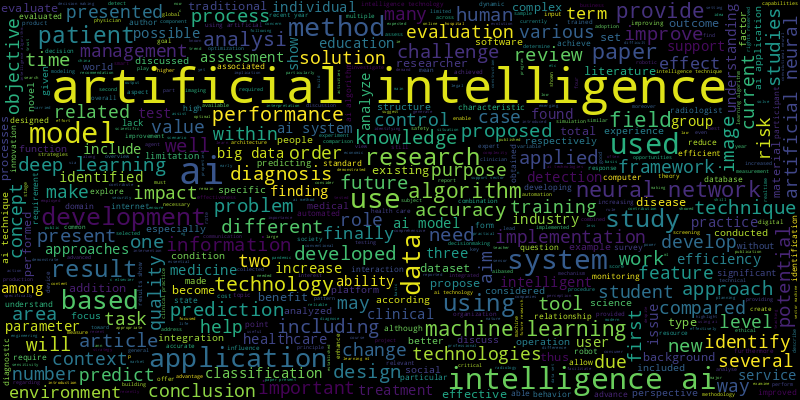

In [19]:
#to view my topics on word cloud
long_string = ','.join(list(df['clean_Abstract'].values))

wordcloud = WordCloud(background_color="black", max_words=1000,height =400, width =800, contour_width=3, contour_color='white')


wordcloud.generate(long_string)

wordcloud.to_image()

In [20]:
#to create customized stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['ai', 'has', 're', 'been', 'as', 'artificial', 'intelligence'])


In [21]:
#to view the stopwords
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ai',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'artificial',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'intelligence',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'o

In [22]:
#to define the stopword function
stopwords = nltk.corpus.stopwords.words('english')


In [23]:
#application of my stopword function
df['clean_Abstract_without_sw'] = df['clean_Abstract'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stop_words]))



In [24]:
#to lemmatize my dataset
df['abstract_lemmatized'] =df ['clean_Abstract_without_sw'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stop_words]))


In [25]:
#to view the output
df.head()

,Publication Type,Article Title,Source Title,Abstract,clean_Abstract,clean_Abstract_without_sw,abstract_lemmatized
0,J,Human- versus Artificial Intelligence,FRONTIERS IN ARTIFICIAL INTELLIGENCE,AI is one of the most debated subjects of toda...,ai is one of the most debated subjects of toda...,one debated subjects today seems little common...,one debated subject today seems little common ...
1,C,Progress of artificial intelligence,PROCEEDINGS OF 2006 INTERNATIONAL CONFERENCE O...,"Artificial Intelligence attempts simulation, e...",artificial intelligence attempts simulation ex...,attempts simulation extension expansion human ...,attempt simulation extension expansion human u...
2,C,Fading Intelligence Theory: A Theory on Keepin...,2017 INTERNATIONAL ARTIFICIAL INTELLIGENCE AND...,As a result of unstoppable rise of Artificial ...,as a result of unstoppable rise of artificial ...,result unstoppable rise remarkable focus quest...,result unstoppable rise remarkable focus quest...
3,J,Brain Intelligence: Go beyond Artificial Intel...,MOBILE NETWORKS & APPLICATIONS,Artificial intelligence (AI) is an important t...,artificial intelligence ai is an important tec...,important technology supports daily social lif...,important technology support daily social life...
4,C,Ambient Intelligence - A State of the Art from...,"PROGRESS IN ARTIFICIAL INTELLIGENCE, PROCEEDINGS",Ambient Intelligence (AmI) deals with a new wo...,ambient intelligence ami deals with a new worl...,ambient ami deals new world computing devices ...,ambient ami deal new world computing device sp...


In [26]:
df['abstract_lemmatized'][6734]

'background student need mental health care face many barrier including cost location availability stigma study show computerassisted therapy conversational chatbot delivering cognitive behavioral therapy cbt offer lessintensive costeffective alternative treating depression anxiety although cbt one effective treatment method applying integrative approach linked equally effective posttreatment improvement integrative psychological offer scalable solution demand affordable convenient lasting secure support grows objective study aimed ass feasibility efficacy using integrative psychological te reduce selfidentified symptom depression anxiety college student method randomized controlled trial participant recruited university across united state participant completed webbased survey including patient health questionnaire generalized anxiety disorder scale positive negative affect scale panas baseline week later test group consisted participant total randomized receive unlimited access te ei

In [27]:
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.cluster import KMeans
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from transformers.pipelines import pipeline
from flair.embeddings import TransformerDocumentEmbeddings, WordEmbeddings, DocumentPoolEmbeddings, StackedEmbeddings


In [28]:
#define the character encoder
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding


In [29]:
#create the dimensional reduction
umap_model = UMAP(n_neighbors=10,
                  n_components=10,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)

In [30]:
#create the clusters
hdbscan_model = HDBSCAN(min_cluster_size=9, min_samples = 20,
 metric='euclidean', prediction_data=True)
kmeans_model = KMeans(n_clusters=15)

In [31]:
#to embed the sentences
sentence_model = SentenceTransformer("paraphrase-distilroberta-base-v1")

In [32]:
#feature extraction
hf_model = pipeline("feature-extraction", model="distilroberta-base")


In [33]:
#to create the transformer
roberta_model = TransformerDocumentEmbeddings('roberta-base')

In [34]:
#to create a docyment level embedding
glove_embedding = WordEmbeddings('crawl')
document_glove_embeddings = DocumentPoolEmbeddings([glove_embedding])

2023-08-13 16:32:44,346 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmpjmo3frr6


100%|██████████| 1.12G/1.12G [00:31<00:00, 37.5MB/s]

2023-08-13 16:33:16,532 copying /tmp/tmpjmo3frr6 to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M.vectors.npy


2023-08-13 16:33:21,822 removing temp file /tmp/tmpjmo3frr6
2023-08-13 16:33:22,315 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M not found in cache, downloading to /tmp/tmp6tazq_y_


100%|██████████| 37.5M/37.5M [00:01<00:00, 27.4MB/s]

2023-08-13 16:33:23,947 copying /tmp/tmp6tazq_y_ to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M
2023-08-13 16:33:23,988 removing temp file /tmp/tmp6tazq_y_


In [35]:
#combine the embeddings
stacked_embeddings = StackedEmbeddings(embeddings=[roberta_model,
document_glove_embeddings])

In [36]:
#to get the occurence of words in a vocabulary
vectorizer_model = CountVectorizer(min_df=10)


In [37]:
#create a dependent variable
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,hdbscan_model=kmeans_model, n_gram_range=(1, 3))



In [38]:
#perform  topic modeling on the processed text
topic,probabilities = topic_model.fit_transform (df['abstract_lemmatized'])


In [39]:
#to get the topics and the frequency
topic_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,0,1583,0_health_medical_data_patient,"[health, medical, data, patient, healthcare, c...",[increasing pressure health care organization ...
1,1,1555,1_human_system_research_machine,"[human, system, research, machine, paper, tech...",[thinking power homo sapiens made human being ...
2,2,1532,2_system_algorithm_paper_application,"[system, algorithm, paper, application, method...",[algorithm excellent performance convolutional...
3,3,1477,3_research_technology_study_data,"[research, technology, study, data, business, ...",[relationship knowledge management advanced ap...
4,4,1434,4_model_data_method_network,"[model, data, method, network, used, neural, n...",[accurate estimation reference evapotranspirat...
5,5,1355,5_cancer_diagnosis_image_patient,"[cancer, diagnosis, image, patient, clinical, ...",[background gastric cancer diagnosis discussed...
6,6,890,6_radiology_image_clinical_study,"[radiology, image, clinical, study, imaging, p...",[development computer technology becoming matu...
7,7,815,7_patient_clinical_study_disease,"[patient, clinical, study, disease, model, met...",[purpose develop intelligencebased model detec...
8,8,793,8_student_teaching_education_learning,"[student, teaching, education, learning, teach...",[english teaching network system us internet p...
9,9,746,9_legal_law_ethical_system,"[legal, law, ethical, system, technology, huma...",[article analyzes main problem contradiction f...


In [40]:
#to get the most important words
topic_model.get_topic(0)


[('health', 0.015593800979936446),
 ('medical', 0.012229291899689897),
 ('data', 0.011332285688824925),
 ('patient', 0.011106407076988048),
 ('healthcare', 0.010804612722945335),
 ('care', 0.010656757785862126),
 ('study', 0.00947863538599468),
 ('clinical', 0.008957383572499882),
 ('technology', 0.008671829843199173),
 ('system', 0.00748431661495732)]

In [41]:
topic_model.visualize_barchart(top_n_topics=5)


In [42]:
topic_model.visualize_term_rank()


In [64]:
related_topics, similar = topic_model.find_topics("artificial intelligence", top_n=8); related_topics

topic_model.visualize_topics(related_topics)


In [44]:
topic_model.visualize_hierarchy(top_n_topics=10)


In [45]:
topic_model.visualize_heatmap()

In [46]:
topic_prediction = topic_model.topics_[:]

In [47]:
df['topic_prediction'] = topic_prediction
df.head()

,Publication Type,Article Title,Source Title,Abstract,clean_Abstract,clean_Abstract_without_sw,abstract_lemmatized,topic_prediction
0,J,Human- versus Artificial Intelligence,FRONTIERS IN ARTIFICIAL INTELLIGENCE,AI is one of the most debated subjects of toda...,ai is one of the most debated subjects of toda...,one debated subjects today seems little common...,one debated subject today seems little common ...,1
1,C,Progress of artificial intelligence,PROCEEDINGS OF 2006 INTERNATIONAL CONFERENCE O...,"Artificial Intelligence attempts simulation, e...",artificial intelligence attempts simulation ex...,attempts simulation extension expansion human ...,attempt simulation extension expansion human u...,1
2,C,Fading Intelligence Theory: A Theory on Keepin...,2017 INTERNATIONAL ARTIFICIAL INTELLIGENCE AND...,As a result of unstoppable rise of Artificial ...,as a result of unstoppable rise of artificial ...,result unstoppable rise remarkable focus quest...,result unstoppable rise remarkable focus quest...,1
3,J,Brain Intelligence: Go beyond Artificial Intel...,MOBILE NETWORKS & APPLICATIONS,Artificial intelligence (AI) is an important t...,artificial intelligence ai is an important tec...,important technology supports daily social lif...,important technology support daily social life...,1
4,C,Ambient Intelligence - A State of the Art from...,"PROGRESS IN ARTIFICIAL INTELLIGENCE, PROCEEDINGS",Ambient Intelligence (AmI) deals with a new wo...,ambient intelligence ami deals with a new worl...,ambient ami deals new world computing devices ...,ambient ami deal new world computing device sp...,1


NMF METHOD

In [48]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [49]:
#nmf hyperparameters
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"

In [50]:
# to get the common words
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()  ##convert from 2d array to 1d
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [51]:
#build the tf-idf matrix
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(df['abstract_lemmatized'])


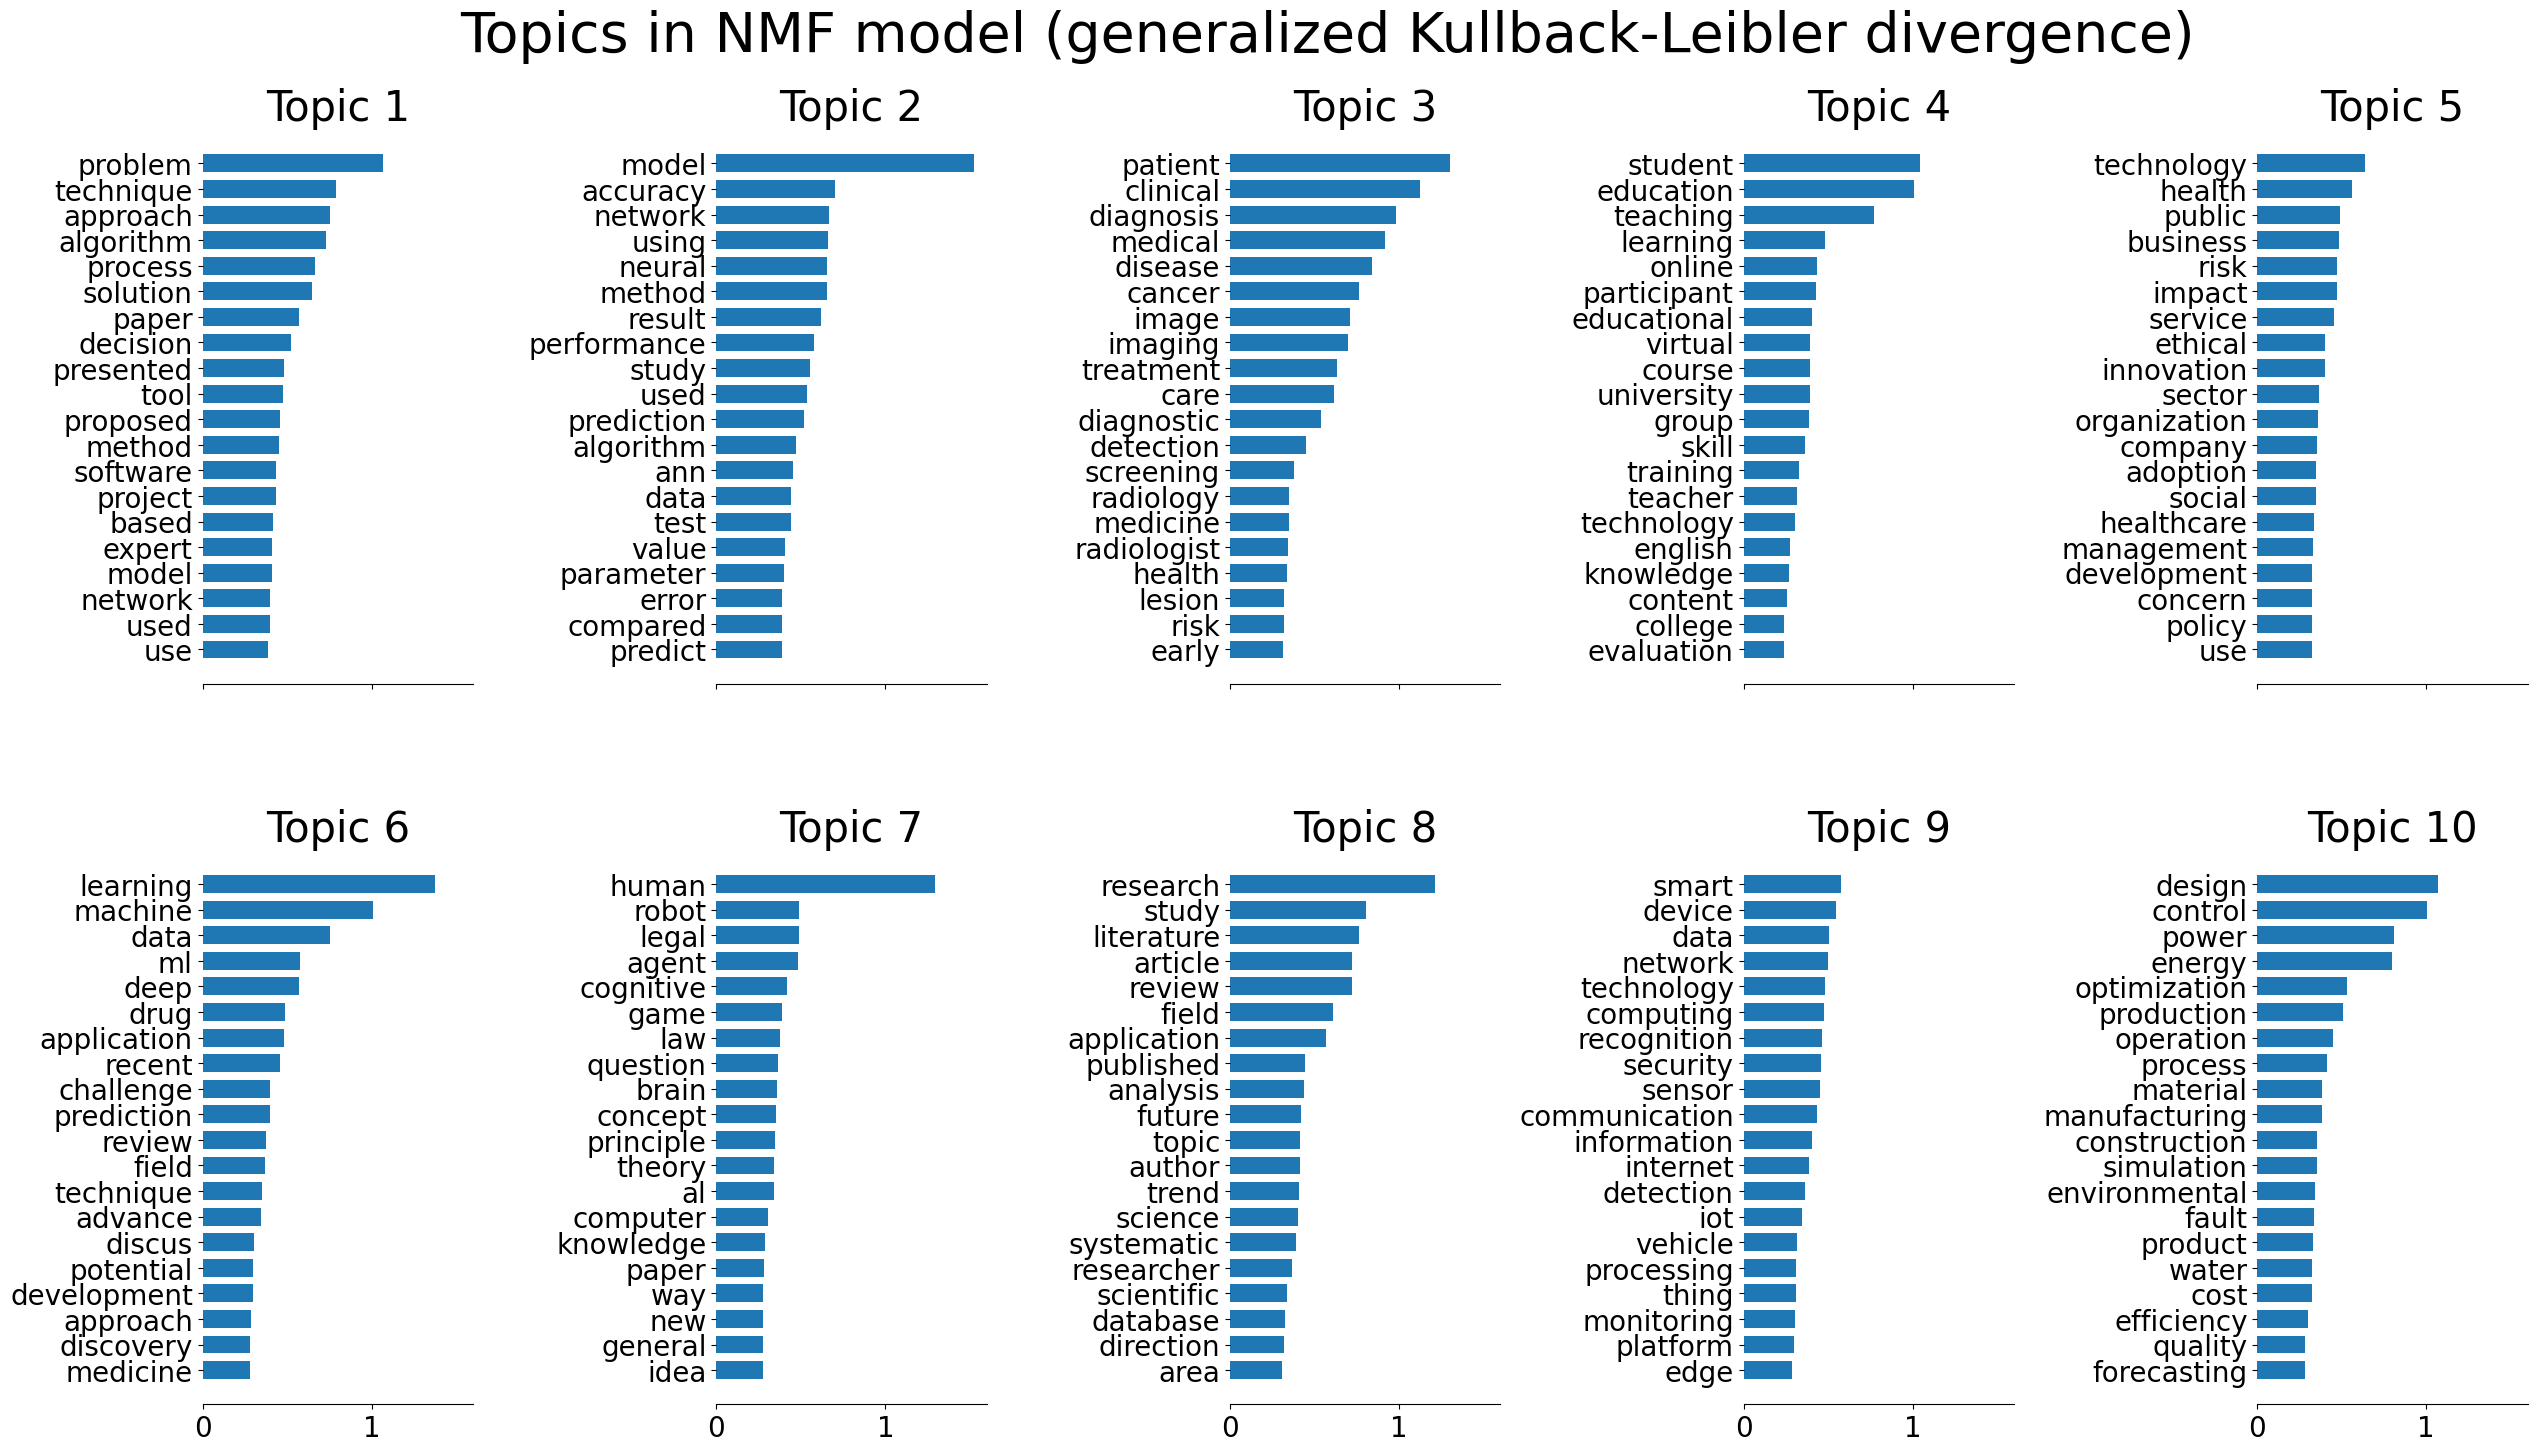

In [52]:
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)